In [1]:
# 🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce

#1.1Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('online_retail.csv') 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#1.3 Basic Info and Shape
# Shape and info
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#1.4 Check Missing Values
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#1.5 Remove Missing CustomerIDs
# Drop rows where CustomerID is missing
df = df.dropna(subset=['CustomerID'])
print("Shape after removing missing CustomerID:", df.shape)



Shape after removing missing CustomerID: (406829, 8)


In [6]:
# 1.6 Identify Cancelled Invoices
# Cancelled invoices usually start with 'C'
cancelled = df[df['InvoiceNo'].astype(str).str.startswith('C')]
print("Number of cancelled invoices:", cancelled.shape[0])


Number of cancelled invoices: 8905


In [7]:
# Keep only non-cancelled rows
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print("Shape after removing cancelled invoices:", df.shape)


Shape after removing cancelled invoices: (397924, 8)


In [8]:
#1.7 Remove Negative or Zero Quantities and Prices
# Check for invalid values
print("Negative or zero Quantity:", (df['Quantity'] <= 0).sum())
print("Negative or zero UnitPrice:", (df['UnitPrice'] <= 0).sum())




Negative or zero Quantity: 0
Negative or zero UnitPrice: 40


In [9]:
# Remove them
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print("Shape after removing invalid rows:", df.shape)

Shape after removing invalid rows: (397884, 8)


In [10]:
#1.8(a)
# Convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



In [11]:
# Create total purchase value column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
df.shape

(397884, 9)

C:\Users\sathw\AppData\Local\Temp\ipykernel_17908\1632078024.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10], palette='viridis')


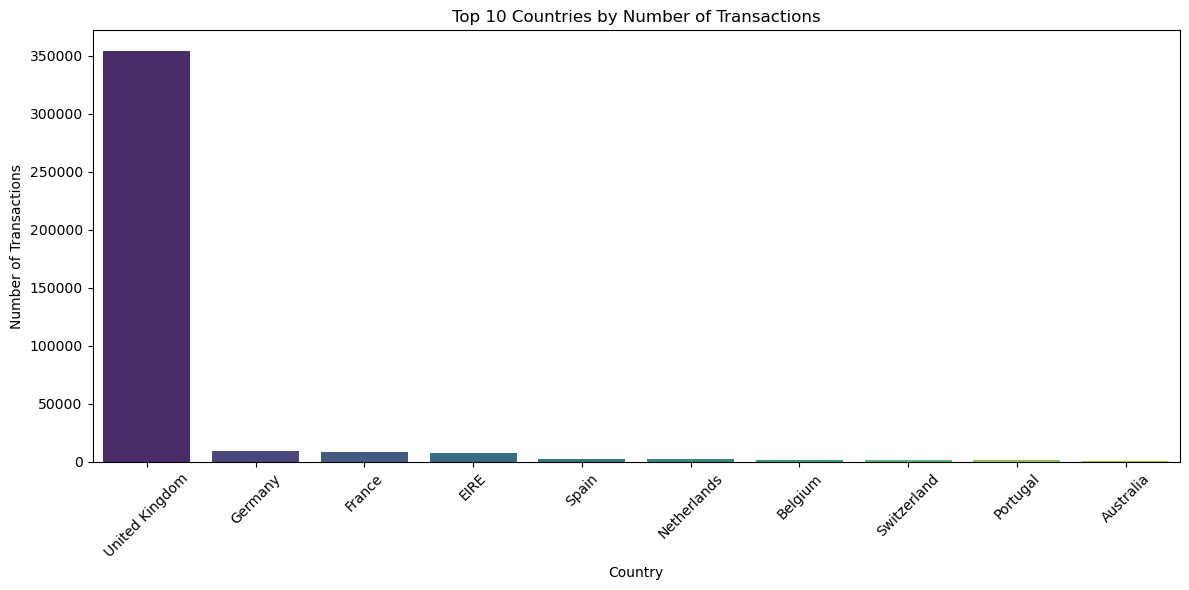

In [13]:
 #2.1 Transactions per Country
# Number of transactions per country
country_counts = df['Country'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10], palette='viridis')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\sathw\AppData\Local\Temp\ipykernel_17908\3116257250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


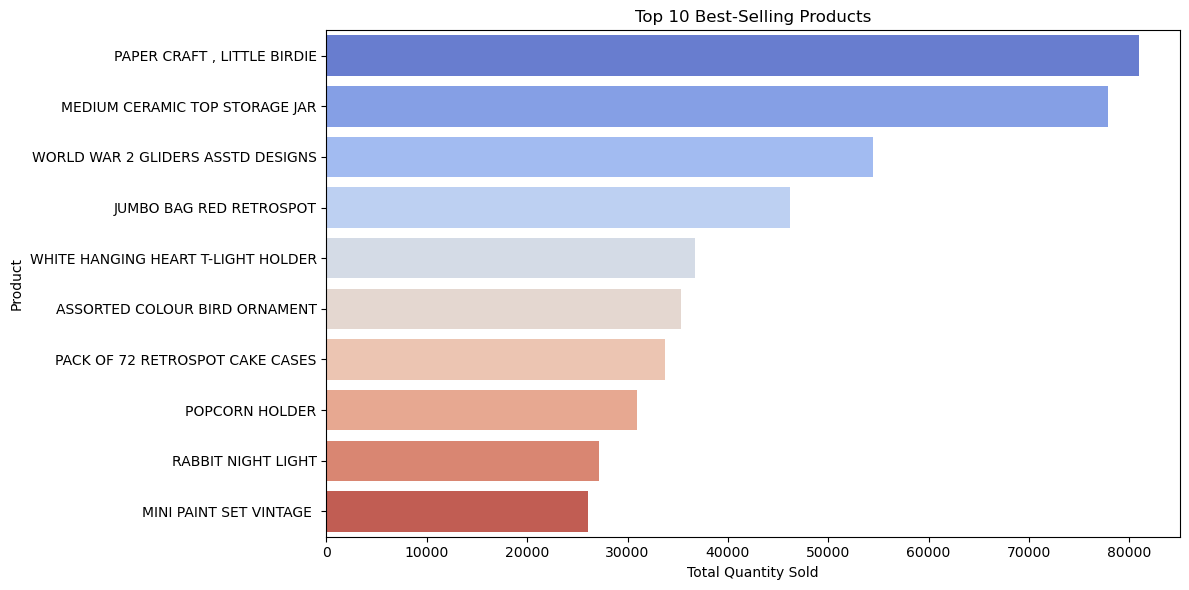

In [14]:
#2.2 Top-Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


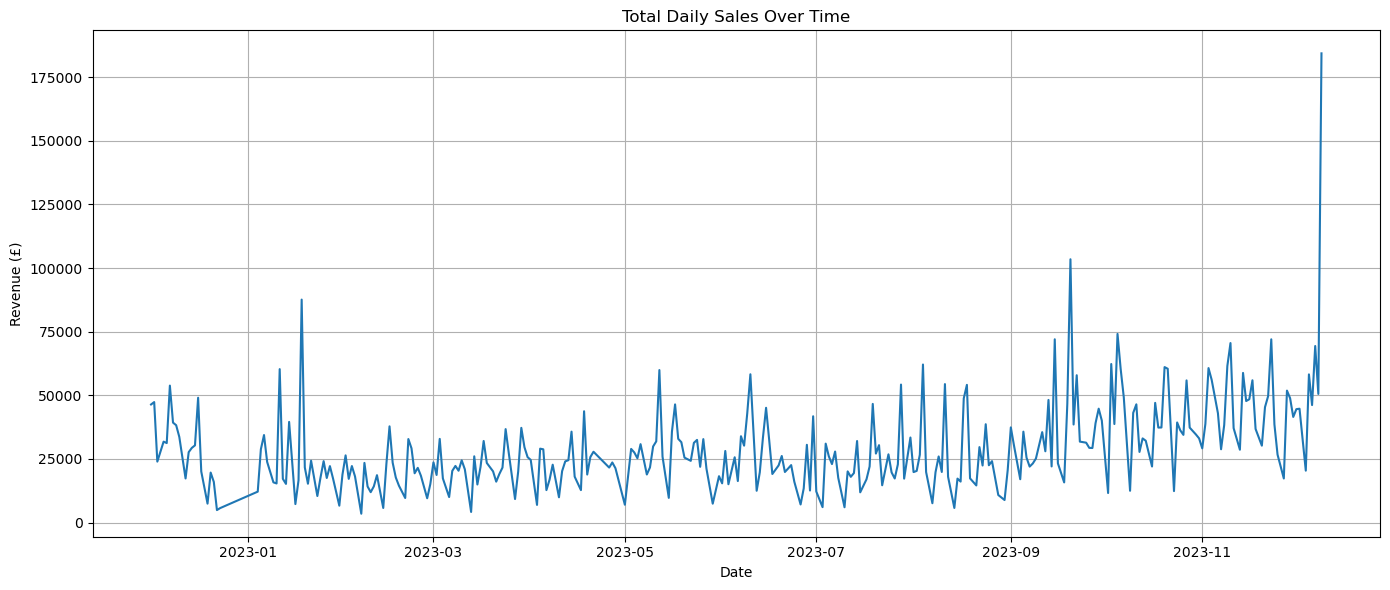

In [15]:
#2.3 Purchase Trends Over Time
# Daily transaction count
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('InvoiceDateOnly')['TotalAmount'].sum()

plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title('Total Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sathw\AppData\Local\Temp\ipykernel_17908\3754837322.py:26: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sathw\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


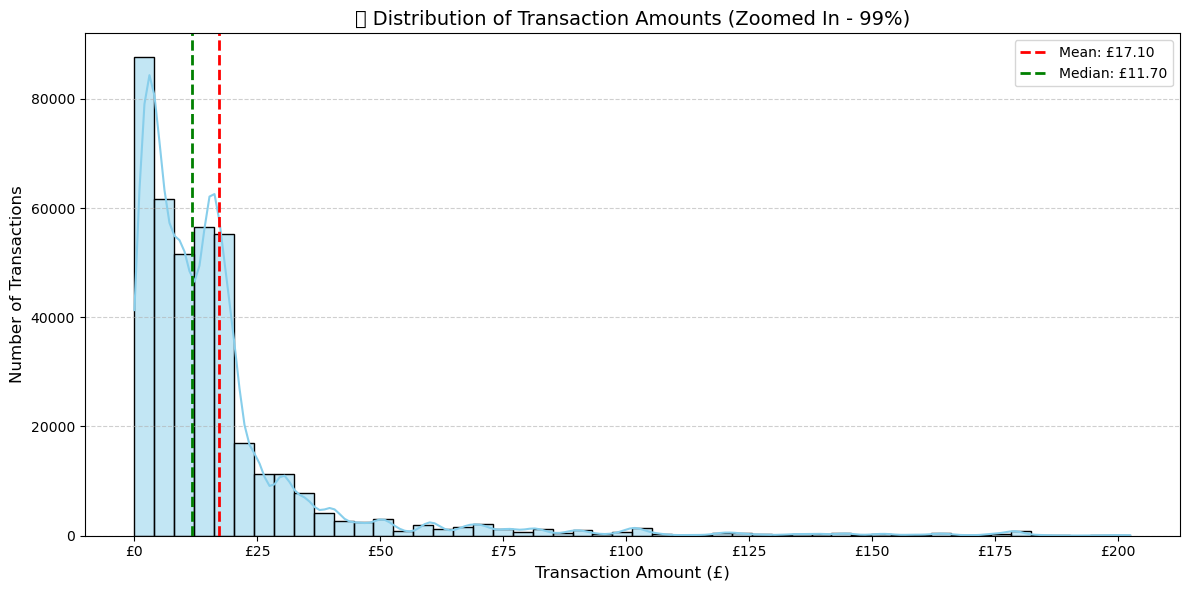

In [16]:
#2.4 Distribution of TotalAmount per Transaction


# 1. Zoomed-In Graph (Main Range) — Focus on 99% of transactions
import matplotlib.ticker as mtick

# Filter only 99% of the data to exclude large outliers
filtered = df[df['TotalAmount'] <= df['TotalAmount'].quantile(0.99)]

plt.figure(figsize=(12, 6))
sns.histplot(filtered['TotalAmount'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Mean and median lines
mean_val = filtered['TotalAmount'].mean()
median_val = filtered['TotalAmount'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: £{mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: £{median_val:.2f}')

# Labels and legend
plt.title('💳 Distribution of Transaction Amounts (Zoomed In - 99%)', fontsize=14)
plt.xlabel('Transaction Amount (£)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Format axis with currency
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))

plt.show()


C:\Users\sathw\AppData\Local\Temp\ipykernel_17908\13460297.py:11: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sathw\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


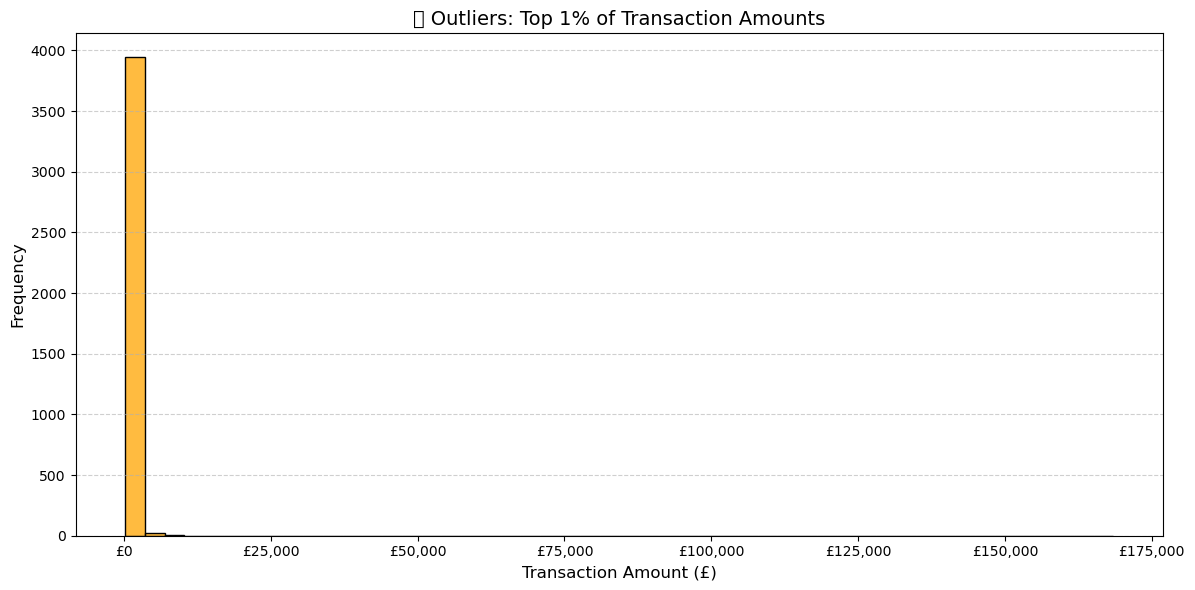

In [17]:
# Filter for top 1% transactions only
outliers = df[df['TotalAmount'] > df['TotalAmount'].quantile(0.99)]

plt.figure(figsize=(12, 6))
sns.histplot(outliers['TotalAmount'], bins=50, color='orange', edgecolor='black')

plt.title('🚨 Outliers: Top 1% of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Format axis
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))

plt.show()


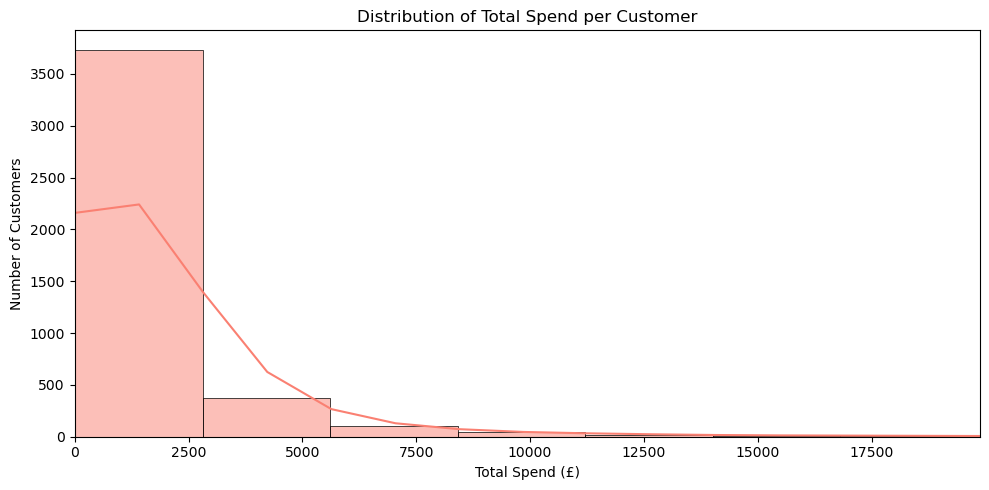

In [18]:
#2.5 Customer Spend Distribution
customer_spend = df.groupby('CustomerID')['TotalAmount'].sum()

plt.figure(figsize=(10, 5))
sns.histplot(customer_spend, bins=100, kde=True, color='salmon')
plt.title('Distribution of Total Spend per Customer')
plt.xlabel('Total Spend (£)')
plt.ylabel('Number of Customers')
plt.xlim(0, customer_spend.quantile(0.99))  # exclude top 1%
plt.tight_layout()
plt.show()


In [19]:
#3.1 Get Latest Purchase Date in Dataset
latest_date = df['InvoiceDate'].max()
print("Latest purchase date in dataset:", latest_date)


Latest purchase date in dataset: 2023-12-09 12:50:00


In [20]:
#3.2 Group and Calculate R, F, M for each Customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalAmount': 'sum'                                    # Monetary
}).reset_index()


In [21]:
#3.3 Rename Columns for Clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [22]:
#3.4 Basic RFM Summary Stats 
rfm.describe()


,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,1.000000,307.415000
50%,15299.500000,50.000000,2.000000,674.485000
75%,16778.750000,141.000000,5.000000,1661.740000
max,18287.000000,373.000000,209.000000,280206.020000


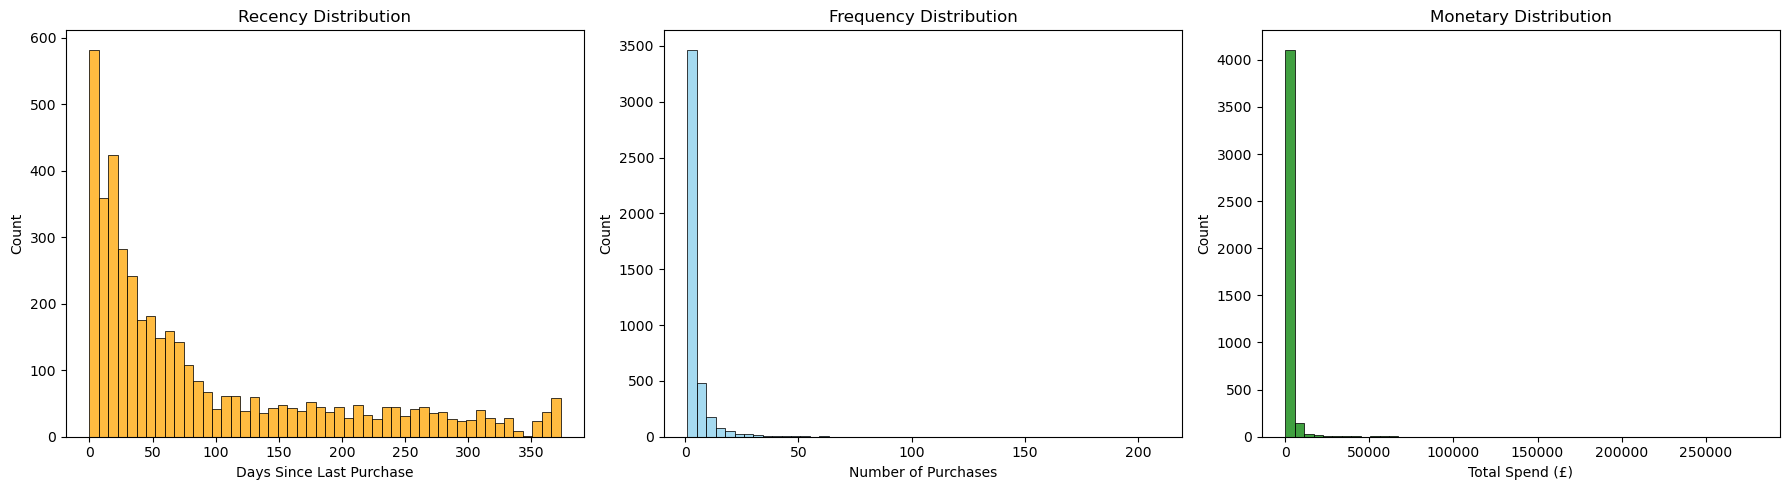

In [23]:
#3.5 Visualize RFM Distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=50, ax=axes[0], color='orange')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')

sns.histplot(rfm['Frequency'], bins=50, ax=axes[1], color='skyblue')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')

sns.histplot(rfm['Monetary'], bins=50, ax=axes[2], color='green')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend (£)')

plt.tight_layout()
plt.show()


In [25]:
#3.6 Standardize the RFM Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [26]:
#4.1 Import Required Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


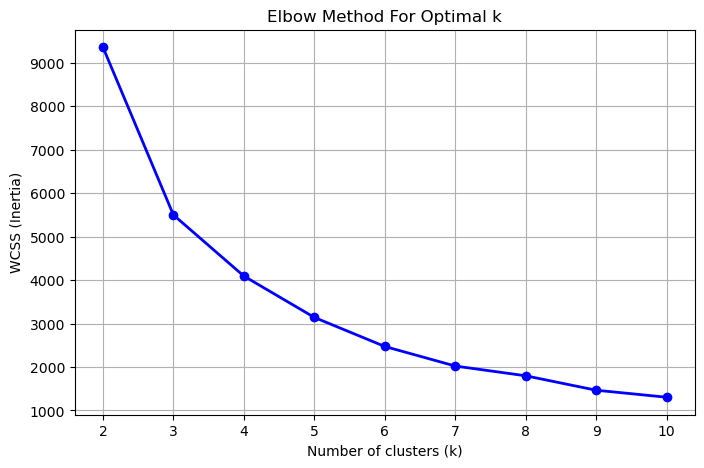

In [27]:
# 4.2 Use the Elbow Method to Choose Number of Clusters (k)
# Elbow method
wcss = []  # Within-cluster sum of squares
K = range(2, 11)  # Try cluster numbers from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [28]:
#4.3 Optional: Use Silhouette Score to Validate k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.560
k=3, Silhouette Score=0.585
k=4, Silhouette Score=0.616
k=5, Silhouette Score=0.617
k=6, Silhouette Score=0.598
k=7, Silhouette Score=0.517
k=8, Silhouette Score=0.491
k=9, Silhouette Score=0.484
k=10, Silhouette Score=0.425


In [33]:
#4.4 Fit KMeans Using Optimal k (let's say 4 for example)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [34]:
#4.5 Analyze the Cluster Averages
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,42.7,3.7,1359.0
1,247.1,1.6,480.6
2,6.4,82.5,127338.3
3,14.5,22.3,12709.1


In [35]:
# Example labeling (you can customize based on your output)
def label_cluster(row):
    if row['Recency'] < 50 and row['Frequency'] > 10 and row['Monetary'] > 1000:
        return 'High-Value'
    elif row['Frequency'] >= 5:
        return 'Regular'
    elif row['Recency'] > 100:
        return 'At-Risk'
    else:
        return 'Occasional'

rfm['Segment'] = rfm.apply(label_cluster, axis=1)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,325,1,77183.60,3,At-Risk
1,12347.0,1,7,4310.00,0,Regular
2,12348.0,74,4,1797.24,0,Occasional
3,12349.0,18,1,1757.55,0,Occasional
4,12350.0,309,1,334.40,1,At-Risk


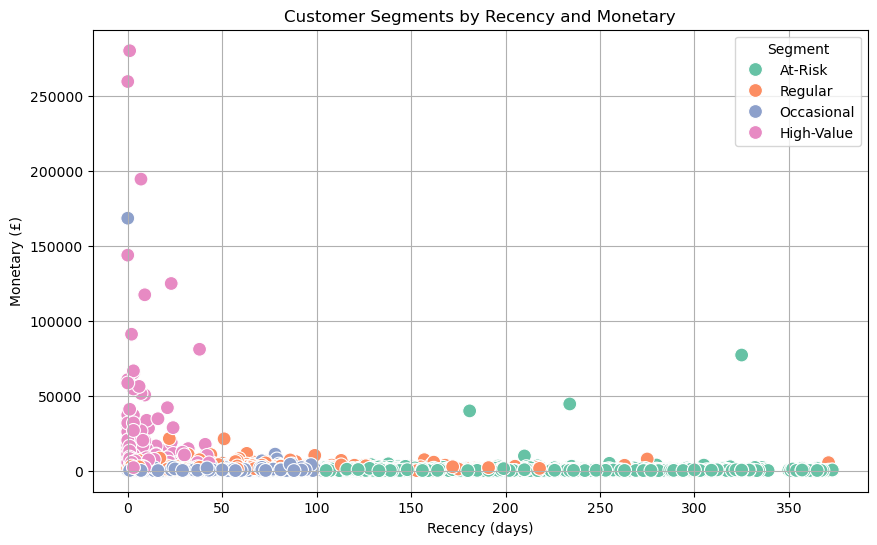

In [36]:
#4.6 Visualize Clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2', s=100)
plt.title('Customer Segments by Recency and Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (£)')
plt.legend(title='Segment')
plt.grid(True)
plt.show()


In [40]:
#4.7 3d plottly
import plotly.express as px
import plotly.io as pio

# Set renderer to work inside Kaggle Notebook
pio.renderers.default = 'iframe_connected'  # or 'iframe_connected'

# 3D scatter plot
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Segment',
    title='3D View of Customer Segments',
    opacity=0.8
)

fig.show()



In [41]:
#Step 5.1: Create a Customer × Product Matrix
# Pivot table: rows = customers, columns = products, values = quantity
product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum'
)

# Replace NaNs with 0 (no purchase = 0)
product_matrix = product_matrix.fillna(0)
product_matrix.head()


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                    
12346.0                                 0.0                             0.0   
12347.0                                 0.0                             0.0   
12348.0                                 0.0                             0.0   
12349.0                                 0.0                             0.0   
12350.0                                 0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
CustomerID                                                      
12346.0                     0.0                           0.0   
12347.0                     0.0                           0.0   
12348.0                     0.0                           0.0   
12349.0                     0.0                           0.0   
12350.0                     0.0                           0.0   

Description   I LOVE LONDON MINI RUCKSACK   NINE DRAWER OFFICE TIDY  \
CustomerID                                                            
12346.0                               0.0                       0.0   
12347.0                               0.0                       0.0   
12348.0                               0.0                       0.0   
12349.0                               0.0                       0.0   
12350.0                               0.0                       0.0   

Description   OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
CustomerID                                                           
12346.0                              0.0                       0.0   
12347.0                              0.0                       0.0   
12348.0                              0.0                       0.0   
12349.0                              0.0                       0.0   
12350.0                              0.0                       0.0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
CustomerID                                                               
12346.0                                   0.0                      0.0   
12347.0                                   0.0                      0.0   
12348.0                                   0.0                      0.0   
12349.0                                   0.0                      0.0   
12350.0                                   0.0                      0.0   

Description   TOADSTOOL BEDSIDE LIGHT    TRELLIS COAT RACK  \
CustomerID                                                   
12346.0                            0.0                 0.0   
12347.0                            0.0                 0.0   
12348.0                            0.0                 0.0   
12349.0                            0.0                 0.0   
12350.0                            0.0                 0.0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
CustomerID                                                        
12346.0                         0.0                         0.0   
12347.0                         0.0                         0.0   
12348.0                         0.0                         0.0   
12349.0                         0.0                         0.0   
12350.0                         0.0                         0.0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
CustomerID                                                          
12346.0                            0.0                        0.0   
12347.0                            0.0                        0.0   
12348.0                            0.0                        0.0   
12349.0                            0.0                        0.0   
12350.0                            0.0                        0.0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
CustomerID    

In [42]:
#Step 5.2: Compute Cosine Similarity Between Products
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose matrix to Product x Customer for item-item similarity
product_similarity = cosine_similarity(product_matrix.T)

# Store as a DataFrame for easy lookup
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=product_matrix.columns,
    columns=product_matrix.columns
)


In [43]:
#Step 5.3: Define the Recommendation Function
def recommend_products(product_name, similarity_df=product_similarity_df, top_n=5):
    product_name = product_name.strip()
    
    if product_name not in similarity_df.columns:
        return f"❌ Product '{product_name}' not found in product list."

    # Get similarity scores, sort by highest (excluding itself)
    similar_items = similarity_df[product_name].sort_values(ascending=False)[1:top_n+1]

    # Return as nicely formatted output
    return pd.DataFrame(similar_items).reset_index().rename(columns={
        'index': 'Recommended Product',
        product_name: 'Similarity Score'
    })


In [44]:
#Step 5.4: Test the Recommender
recommend_products("WHITE HANGING HEART T-LIGHT HOLDER")


,Description,Similarity Score
0,GIN + TONIC DIET METAL SIGN,0.750410
1,RED HANGING HEART T-LIGHT HOLDER,0.658719
2,WASHROOM METAL SIGN,0.643500
3,LAUNDRY 15C METAL SIGN,0.642206
4,GREEN VINTAGE SPOT BEAKER,0.631461


In [46]:
pip install fuzzywuzzy python-Levenshtein


Note: you may need to restart the kernel to use updated packages.


In [49]:
from fuzzywuzzy import process, fuzz

def suggest_and_recommend_products(user_input, similarity_df, top_n=5, suggest_n=3, score_cutoff=60):
    user_input = user_input.strip().upper()

    # Get top N fuzzy matches
    matches = process.extractBests(
        query=user_input,
        choices=similarity_df.columns,
        scorer=fuzz.token_sort_ratio,
        limit=suggest_n,
        score_cutoff=score_cutoff
    )

    if not matches:
        return None, None, []

    # Build a list of suggestions to show user
    suggestions = [match[0] for match in matches]

    return suggestions


In [50]:
suggestions = suggest_and_recommend_products("heart candle light", product_similarity_df)

if suggestions:
    print("🔍 Top Suggestions:")
    for i, s in enumerate(suggestions, 1):
        print(f"{i}. {s}")
else:
    print("❌ No close matches found.")


🔍 Top Suggestions:
1. RED HEARTS LIGHT CHAIN 
2. PINK HEARTS LIGHT CHAIN 
3. HYACINTH BULB T-LIGHT CANDLES


In [51]:
def recommend_for_selected_product(selected_product, similarity_df, top_n=5):
    similar_items = similarity_df[selected_product].sort_values(ascending=False)[1:top_n+1]
    return pd.DataFrame(similar_items).reset_index().rename(columns={
        'index': 'Recommended Product',
        selected_product: 'Similarity Score'
    })


In [52]:
user_input = "heart candle light"
suggestions = suggest_and_recommend_products(user_input, product_similarity_df)

if suggestions:
    print("✅ Suggestions:")
    for i, s in enumerate(suggestions, 1):
        print(f"{i}. {s}")

    # Simulate user selecting first suggestion
    selected = suggestions[0]
    print(f"\n🔮 Recommending products similar to: {selected}\n")
    display(recommend_for_selected_product(selected, product_similarity_df))

else:
    print("❌ No good match found.")


✅ Suggestions:
1. RED HEARTS LIGHT CHAIN 
2. PINK HEARTS LIGHT CHAIN 
3. HYACINTH BULB T-LIGHT CANDLES

🔮 Recommending products similar to: RED HEARTS LIGHT CHAIN 



,Description,Similarity Score
0,PINK HEARTS LIGHT CHAIN,0.670373
1,PURPLE DRESS JEWELLERY STAND,0.643833
2,DANISH ROSE TRINKET TRAYS,0.626118
3,CANDY HEART HANGING DECORATION,0.624310
4,TROPICAL PASSPORT COVER,0.617153


In [53]:
import joblib
joblib.dump(product_similarity_df, 'product_similarity.pkl')


['product_similarity.pkl']

In [54]:
import os
os.getcwd()


'C:\\Users\\sathw\\anaconda_projects'

In [1]:
!pip show streamlit


Name: streamlit
Version: 1.45.1
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\Users\sathw\anaconda3\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, requests, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 
